# Google Playstore Apps Rating Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:

data = pd.read_csv('googleplaystore.csv')



In [3]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


## Data Overview...

In [4]:

data.columns = data.columns.str.strip()

pd.set_option('display.max_columns', None)


In [5]:
data.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4410,Rock N' Cash Casino Slots -Free Vegas Slot Games,GAME,4.7,6187,33M,"100,000+",Free,0,Teen,Casino,"July 27, 2018",1.15.0,4.0.3 and up
6587,Blood Pressure Log - MyDiary,MEDICAL,4.7,8347,2.6M,"500,000+",Free,0,Everyone,Medical,"April 13, 2018",1.4.6,4.0 and up
4274,J. Cole Albums (2007-2017),FAMILY,4.6,7,7.3M,"1,000+",Free,0,Mature 17+,Entertainment,"April 11, 2018",1.3,4.0.3 and up


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**Initital Insights**

- ***App*** and ***Current Ver*** needs to be dropped as they contained a lot of unique values. Almost like the _Name_ and _ID_ column in different datasets.

- ***Reviews*** Column's data needs to be changed from Object type to int.

- ***Size*** column contains object values. It can be converted to Numerical, we just have to remove the alphabets from the columns

- ***Installs*** column as well. Datatype change to Numerical by removing the alphabet characters from the entries.

- ***Ratings*** is our Output column and contains Null Values... ->  ( Drop Missing Values )

- ***Price*** datatype needs to be changed from object to int.

- ***Last Updated**** column's datatype needs to be changed from _object_ to _date time_.

- ***Android Ver*** column may have a lot of categories and can be reduced.

In [7]:

print(f"\nThe Dataset Contains {data.shape[0]} rows and {data.shape[1]} columns\n")




The Dataset Contains 10841 rows and 13 columns



In [8]:

print("\nNumber of  Null Values: ",data.isnull().sum().sum(),"\n")




Number of  Null Values:  1487 



In [9]:

print("\nNumber of Duplicated Values: ",data.duplicated().sum(),"\n")




Number of Duplicated Values:  483 



In [10]:


data.drop_duplicates(inplace = True)


Deleted Duplicated Items.

In [11]:
data.describe()

,Rating
count,8893.000000
mean,4.189542
std,0.545452
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


The Ratings column has a maximum Rating as 19.0 which is Unusual because the Ratings are always between 0.0 and 5.0.

In [12]:

print("\nNull Value Percentage: ")
( data.isnull().sum() / data.shape[0] ) * 100




Null Value Percentage: 


App                0.000000
Category           0.000000
Rating            14.143657
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009654
Price              0.000000
Content Rating     0.009654
Genres             0.000000
Last Updated       0.000000
Current Ver        0.077235
Android Ver        0.028963
dtype: float64

**As we can see, Ratings column has 1474 Null Values ( Around 14% of the actual data).**


**There are Multiple ways we can handle this:**  

- Dropping Entire Column : But this Data is the central Pivot of our Dataset ❌

- Dropping the Rows : This is the best option for Model Building as we cannot impute the missing data in case of the output column. We may loss some information but it is the only Valid option for Model building.

- For Analysis Part, we will impute this column with a Constant, "Unrated". It is valid as these Apps may not have been rated at all... We can also use Mean, Mode or KNN imputation techniques to fill the NaN values... 

## Data Cleaning

In [13]:
data.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9081,Guardians of Ancora,FAMILY,4.4,969,26M,"50,000+",Free,0,Everyone,Educational;Action & Adventure,"July 20, 2018",2.9.1,2.3.3 and up
7861,CT Scan Generations,FAMILY,4.7,6,5.1M,"1,000+",Free,0,Everyone,Education,"April 1, 2018",1.0,4.0 and up
4145,PUBG MOBILE,GAME,4.4,3697174,36M,"50,000,000+",Free,0,Teen,Action,"July 24, 2018",0.7.0,4.3 and up


Droping Unnecessary columns from the Dataset.

In [14]:


data = data.drop(columns=['App','Current Ver'])


- These two Columns are unnecassary to be kept in the dataset as they might create the high caredinality in the dataset

Checking for Rating greater than 5.0

In [15]:


data[data['Rating'] > 5.0]


,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
10472,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,NaN


In [16]:

data.drop(10472, inplace = True)



In [17]:
data.describe()

,Rating
count,8892.000000
mean,4.187877
std,0.522377
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


The Ratings Columns is now Evenly Distributed and does not contain any extreme or unusual Values.

In [18]:

data["Reviews"] = data["Reviews"].astype('int')


In [19]:
data['Installs'] = data['Installs'].str.replace(",","").str.replace("+","")

In [20]:

data['Price in Dollars'] = data['Price'].str.replace("$","")


data['Price in Dollars'] = data['Price in Dollars'].astype('float')


del data['Price']



In [21]:

data['Last Updated'] = pd.to_datetime(data['Last Updated'])


In [22]:
import numpy as np

# Replace "Varies with device" with NaN
cols_to_clean = ["Size", "Android Ver"]
data[cols_to_clean] = data[cols_to_clean].replace("Varies with device", np.nan)

# ----- Size -----
data["Size_raw"] = data["Size"]  # keep raw copy


# Convert KB to MB (optional)
def size_to_mb(size):
    if pd.isna(size) or size == "Varies with device":
        return np.nan
    size = size.strip()
    if size.endswith("M"):
        return round(float(size.replace("M", "")), 2)
    if size.endswith("k"):
        return round(float(size.replace("k", "")) / 1024, 2)
    return np.nan


data["Size(in MBs)"] = data["Size"].apply(size_to_mb)




# ----- Android Ver -----
data["Android_Ver_raw"] = data["Android Ver"]  # keep raw copy
data["Android Ver"] = (
    data["Android Ver"].astype(str)
                       .str.extract(r"(\d+(\.\d+)*)")[0]
)
data["Android Ver"] = pd.to_numeric(data["Android Ver"], errors="coerce")

These three columns contained a value "Varies with device". Keeping them would have created a lot of noise for Model Building or even for Analysis. So I replaced these values with NaN, so that I can drop them later.

Also the Column size contained the values in MB's as well as in Kb. I have converted all of them values to Kb's and converted the column to float type


In [23]:
data.sample(3)

,Category,Rating,Reviews,Size,Installs,Type,Content Rating,Genres,Last Updated,Android Ver,Price in Dollars,Size_raw,Size(in MBs),Android_Ver_raw
8265,BOOKS_AND_REFERENCE,3.8,38,7.2M,5000,Free,Everyone,Books & Reference,2018-06-18,4.4,0.0,7.2M,7.2,4.4 and up
8357,MAPS_AND_NAVIGATION,4.5,65448,NaN,5000000,Free,Everyone,Maps & Navigation,2018-08-02,NaN,0.0,NaN,NaN,NaN
5396,PHOTOGRAPHY,4.5,559931,NaN,10000000,Free,Everyone,Photography,2018-05-10,NaN,0.0,NaN,NaN,NaN


In [24]:
data.dtypes

Category                    object
Rating                     float64
Reviews                      int64
Size                        object
Installs                    object
Type                        object
Content Rating              object
Genres                      object
Last Updated        datetime64[ns]
Android Ver                float64
Price in Dollars           float64
Size_raw                    object
Size(in MBs)               float64
Android_Ver_raw             object
dtype: object

Initital Insights

App and Current Ver needs to be dropped as they contained a lot of unique values. Almost like the Name and ID column in different datasets. ✔️

Reviews Column's data needs to be changed from Object type to int. ✔️

Installs column as well. Datatype change to Numerical by removing the alphabet characters from the entries. ✔️

Price datatype needs to be changed from object to int. ✔️

Last Updated* column's datatype needs to be changed from object to date time.  ✔️


***These three columns contain varies with version cagtegory that has large number of values :***

- Size column contains object values. It can be converted to Numerical, we just have to remove the alphabets from the columns.  ✔️

- Android Ver column may have a lot of categories and can be reduced.  ✔️


- Ratings is our Output column and contains Null Values... -> ( Drop Missing Values ) ⚠️

In [25]:

data.drop(columns=['Size_raw', 'Size', 'Android_Ver_raw'], inplace=True)


Deleted the Raw columns that we kept for the backup of the column, if something goes wrong...

In [26]:
data.shape

(10357, 11)

In [27]:


max_date = data['Last Updated'].max()

data['Days Since Last Update'] = (max_date - data["Last Updated"]).dt.days

def freshness(days):
    if days <=90:
        return "Recently Updated"
    elif 91 <= days <= 365:
        return "Moderately Updated"
    else:
        return "Outdated"
    
data["Update Freshness"] = data['Days Since Last Update'].apply(freshness)


data.drop(columns=['Last Updated'], inplace = True)

_We can see the max of the date column(i.e most recent updated date )of any app.  Then that will give us a little idea about when the dataset was fetched, based on that we will create another column for freshness of the update for apps or days since last update etc.... ??_


**Created two new columns from the **Last Update** column.**
1. **Days Since Last Update:** Total Days since the App is last updated.
2. **Update Freshness:** Categories based on how frequently the developers give updates on the App.


- Dropped the "Last Update" Column afterwards...


In [28]:
data.sample(6)

,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Android Ver,Price in Dollars,Size(in MBs),Days Since Last Update,Update Freshness
9704,MEDICAL,NaN,4,100,Paid,Everyone,Medical,4.0,0.99,15.0,179,Moderately Updated
6441,MAPS_AND_NAVIGATION,4.9,124,1000,Free,Everyone,Maps & Navigation,NaN,0.00,3.4,135,Moderately Updated
4737,FOOD_AND_DRINK,4.4,205,50000,Free,Everyone,Food & Drink,4.4,0.00,33.0,38,Recently Updated
10334,TOOLS,NaN,3,1000,Free,Everyone,Tools,3.0,0.00,12.0,285,Moderately Updated
5541,GAME,4.6,19070,100000,Free,Everyone 10+,Action,NaN,0.00,90.0,4,Recently Updated
2120,FAMILY,4.1,148295,10000000,Free,Everyone,Casual;Action & Adventure,4.1,0.00,26.0,156,Moderately Updated


- Dealing with Null Values...

In [29]:
data.isnull().sum()

Category                     0
Rating                    1465
Reviews                      0
Installs                     0
Type                         1
Content Rating               0
Genres                       0
Android Ver               2962
Price in Dollars             0
Size(in MBs)              1526
Days Since Last Update       0
Update Freshness             0
dtype: int64

Null Values in ***Android Ver*** and ***Size(in MBs)*** needs to be dropped completed as these are the rows that had the value: "Varies with Device". If kept (_by imputing_), they would create a lot of noise and improper values that will induce the bias in the data.

**Missing values in the Ratings will be dealt separately based on Analysis Part and Model Building part:**

- For Model Buliding : The Missing Values will be dropped completed.
- For Analyis : We will impute the missing values with constand "Unrated".  

In [30]:


data.dropna(subset=['Android Ver','Size(in MBs)'], inplace = True)


In [31]:
data.isnull().sum()

Category                     0
Rating                    1114
Reviews                      0
Installs                     0
Type                         0
Content Rating               0
Genres                       0
Android Ver                  0
Price in Dollars             0
Size(in MBs)                 0
Days Since Last Update       0
Update Freshness             0
dtype: int64

**Now we will create two different datasets...** 
One for Analysis and One for Model Building.


In [32]:


EDA_data = data.copy()


In [33]:


EDA_data.fillna("Unrated", inplace = True)


Filled Missing values with "Unrated" for Data Analysis.

In [34]:


data.dropna(inplace = True)


Dropped the Missing Values for Model Building.

In [35]:


print("\nNumber of  Null Values Presnt in ML Dataset: ",data.isnull().sum().sum(),"\n")




Number of  Null Values Presnt in ML Dataset:  0 



In [36]:


print("\nNumber of  Null Values Presnt in Analysis Dataset: ",data.isnull().sum().sum(),"\n")




Number of  Null Values Presnt in Analysis Dataset:  0 



No Null Values in any of the Dataset...

In [37]:


data = data.reset_index(drop = True)

EDA_data = EDA_data.reset_index(drop = True)


In [38]:
data.sample(3)

,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Android Ver,Price in Dollars,Size(in MBs),Days Since Last Update,Update Freshness
1691,PERSONALIZATION,4.3,881,10000,Paid,Everyone,Personalization,2.1,9.99,5.9,49,Recently Updated
4492,GAME,4.2,951435,50000000,Free,Everyone,Racing,2.1,0.00,14.0,203,Moderately Updated
4986,TOOLS,4.2,3606,100000,Free,Everyone,Tools,4.4,0.00,17.0,45,Recently Updated


In [39]:
EDA_data.sample(3)

,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Android Ver,Price in Dollars,Size(in MBs),Days Since Last Update,Update Freshness
5712,SHOPPING,3.1,6697,500000,Free,Everyone,Shopping,4.0,0.0,11.0,188,Moderately Updated
6312,BUSINESS,5.0,3,100,Free,Everyone,Business,4.1,0.0,4.7,83,Recently Updated
842,GAME,4.4,4066989,100000000,Free,Everyone 10+,Strategy,4.1,0.0,69.0,33,Recently Updated


- Checking Final Shape of Data : 

In [40]:


print(f"\nDataset(for model building) has {data.shape[0]} rows and {data.shape[1]} columns\n")



Dataset(for model building) has 5974 rows and 12 columns



In [41]:


print(f"\nOur Dataset(for Analysis) has now {EDA_data.shape[0]} rows and {EDA_data.shape[1]} columns\n")



Our Dataset(for Analysis) has now 7088 rows and 12 columns



In [42]:


data.to_csv("Cleaned Google Playstore Data (ML).csv", index= False)


In [43]:


EDA_data.to_csv("Cleaned Google Playstore Data (Analysis).csv", index = False )


In [44]:
EDA_data.sample(4)

,Category,Rating,Reviews,Installs,Type,Content Rating,Genres,Android Ver,Price in Dollars,Size(in MBs),Days Since Last Update,Update Freshness
5383,NEWS_AND_MAGAZINES,2.5,2055,100000,Free,Everyone,News & Magazines,4.4,0.00,17.0,35,Recently Updated
1047,FAMILY,4.4,685,100000,Free,Everyone,Card;Brain Games,4.1,0.00,26.0,23,Recently Updated
1199,MEDICAL,4.6,156,500,Paid,Everyone,Medical,4.4,3.49,22.0,147,Moderately Updated
5140,COMICS,5.0,34,5000,Free,Everyone,Comics,5.0,0.00,12.0,8,Recently Updated


## Data Analysis

In [45]:


data = pd.read_csv("Cleaned Google Playstore Data (Analysis).csv")


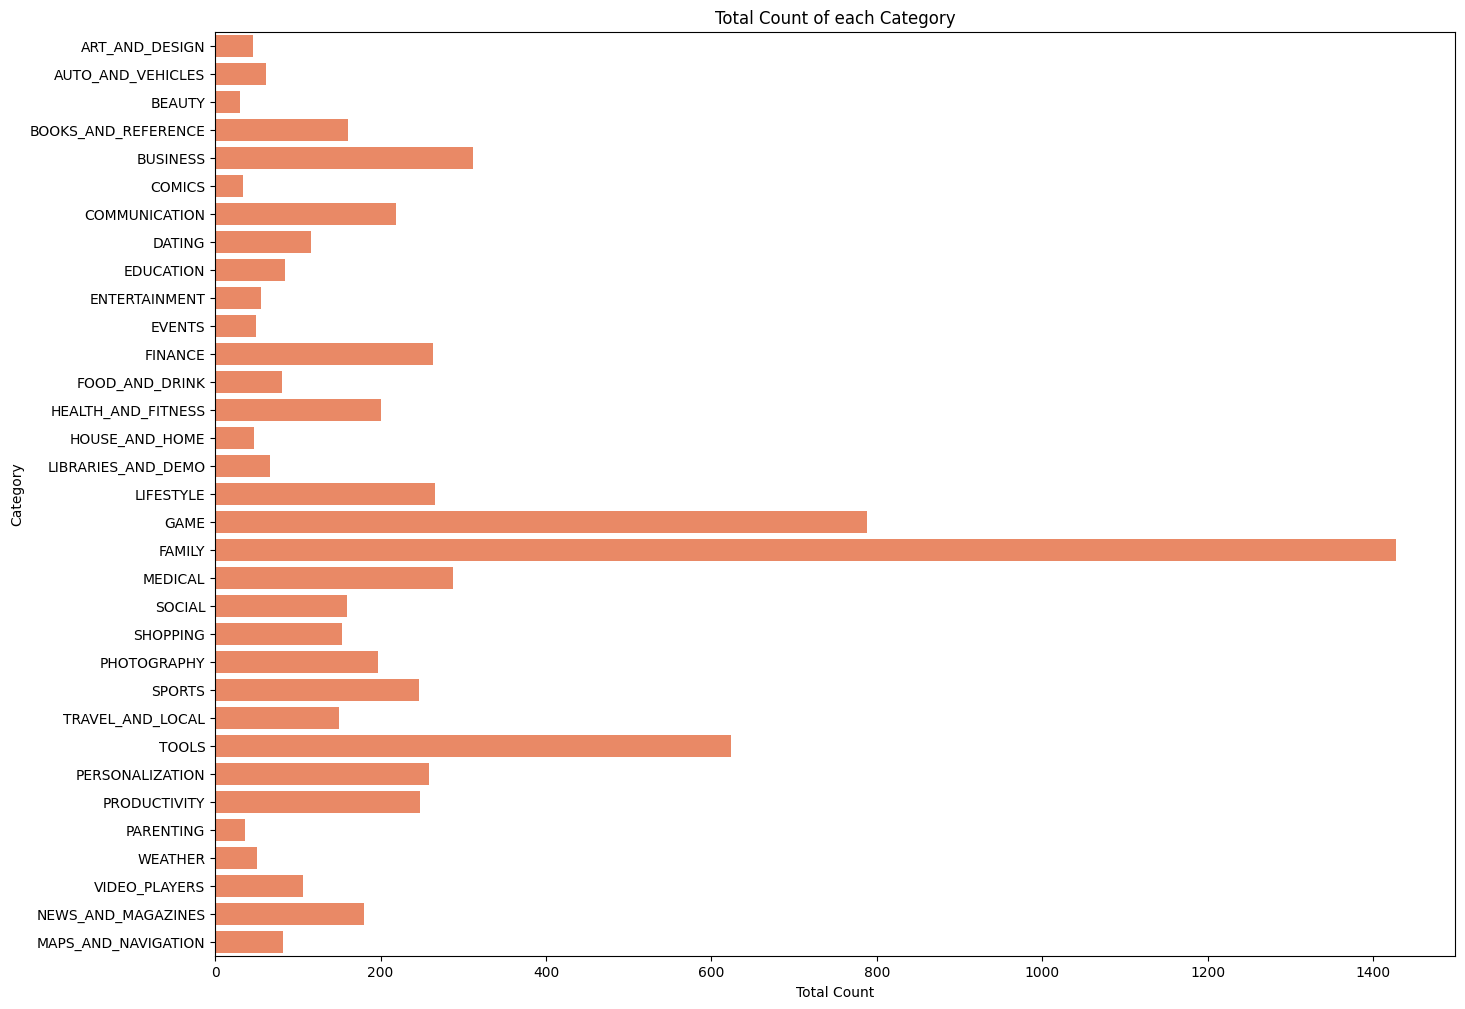

In [46]:


plt.figure(figsize=(16,12))

sns.countplot(data['Category'], color='coral')

plt.title("Total Count of each Category")
plt.xlabel("Total Count")
plt.ylabel("Category")
plt.show()


- Dataset has the highest number of Apps belonging to the category: Family, followed by Game and Tools.
- Apps that belong to Parenting, Comics and Beauty categoreis are less in number.

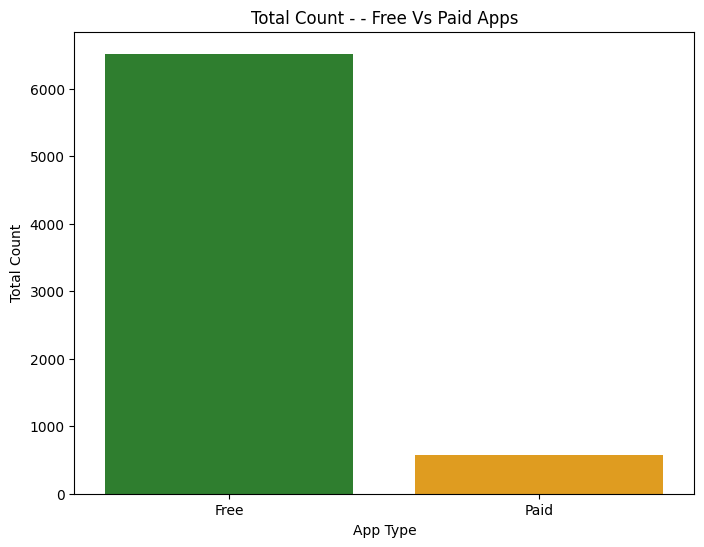

In [47]:


plt.figure(figsize=(8,6))

sns.countplot(data = data, x = 'Type', palette=['forestgreen', 'orange'])

plt.title("Total Count - - Free Vs Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Total Count")
plt.show()


**Number of Free Apps  ->    6518**


**Number of Paid Apps  ->      570**

- Arond 92% of the Apps present in the Dataset are free. 
- Only 8% of the Apps are Paid.

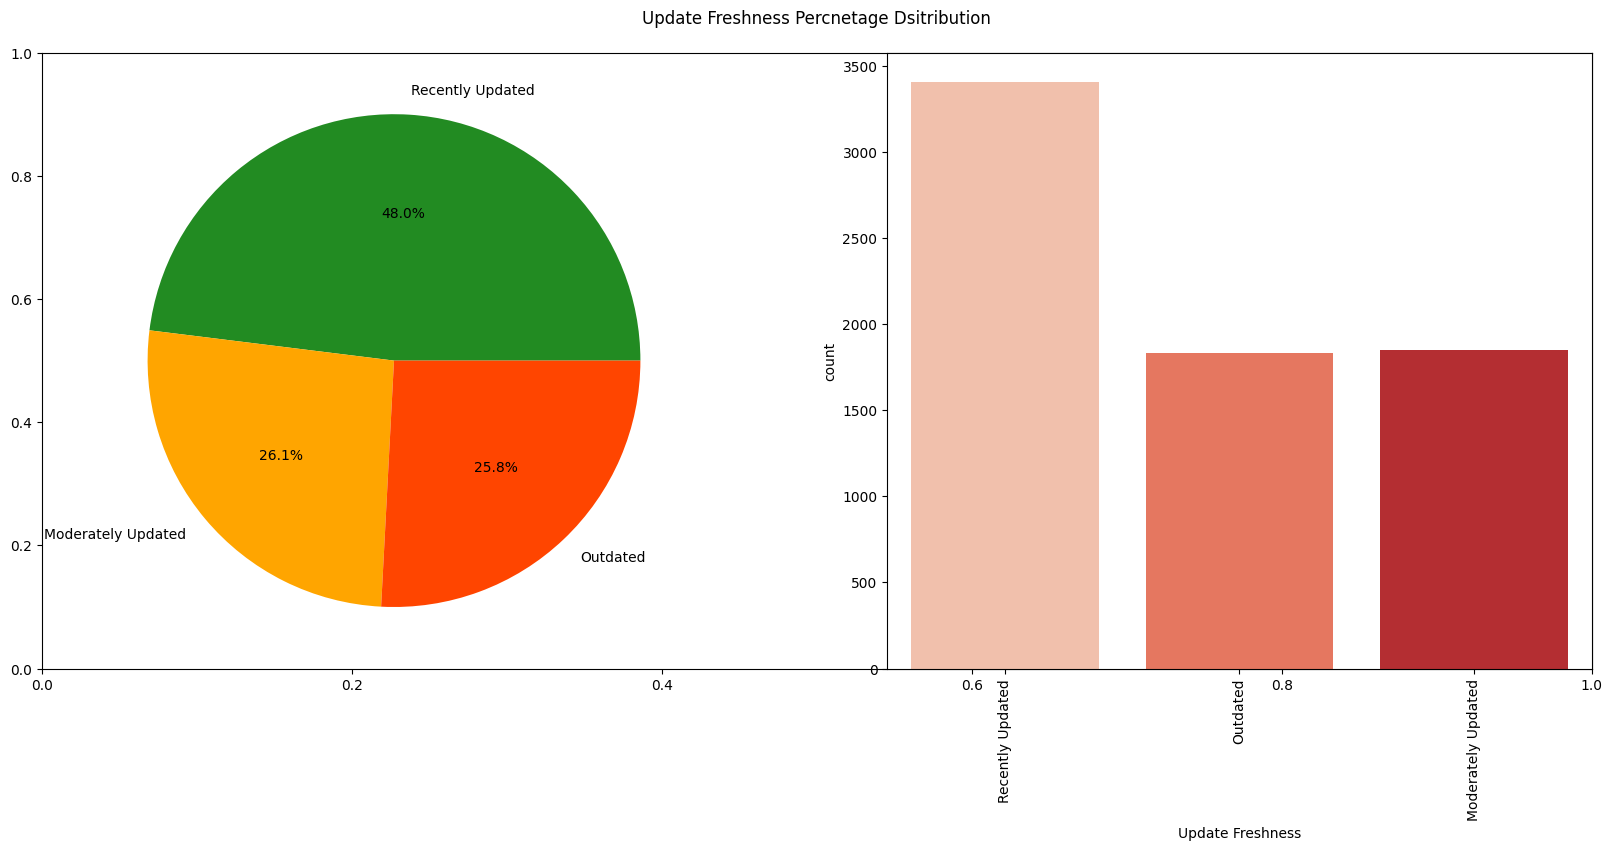

In [48]:


plt.figure(figsize=(20,8))

plt.title("Update Freshness Percnetage Dsitribution\n")

plt.subplot(1,2,1)
plt.pie(x = data['Update Freshness'].value_counts(),
       labels = data['Update Freshness'].value_counts().index,
       autopct = '%1.1f%%',
       colors=['forestgreen', 'orange', 'orangered'])

plt.subplot(1,2,2)
sns.countplot(x = data["Update Freshness"], palette='Reds')
plt.xticks(rotation = 90)



#plt.tight_layout()
plt.show()


- _48% of the developers are providing the Updates to their apps frequently (around 3400 Apps)._
- _Around 25% of the Apps are outdated and have not received any updates._
- _26% of the Apps present in the dataset are receiving the Updates occasionally._

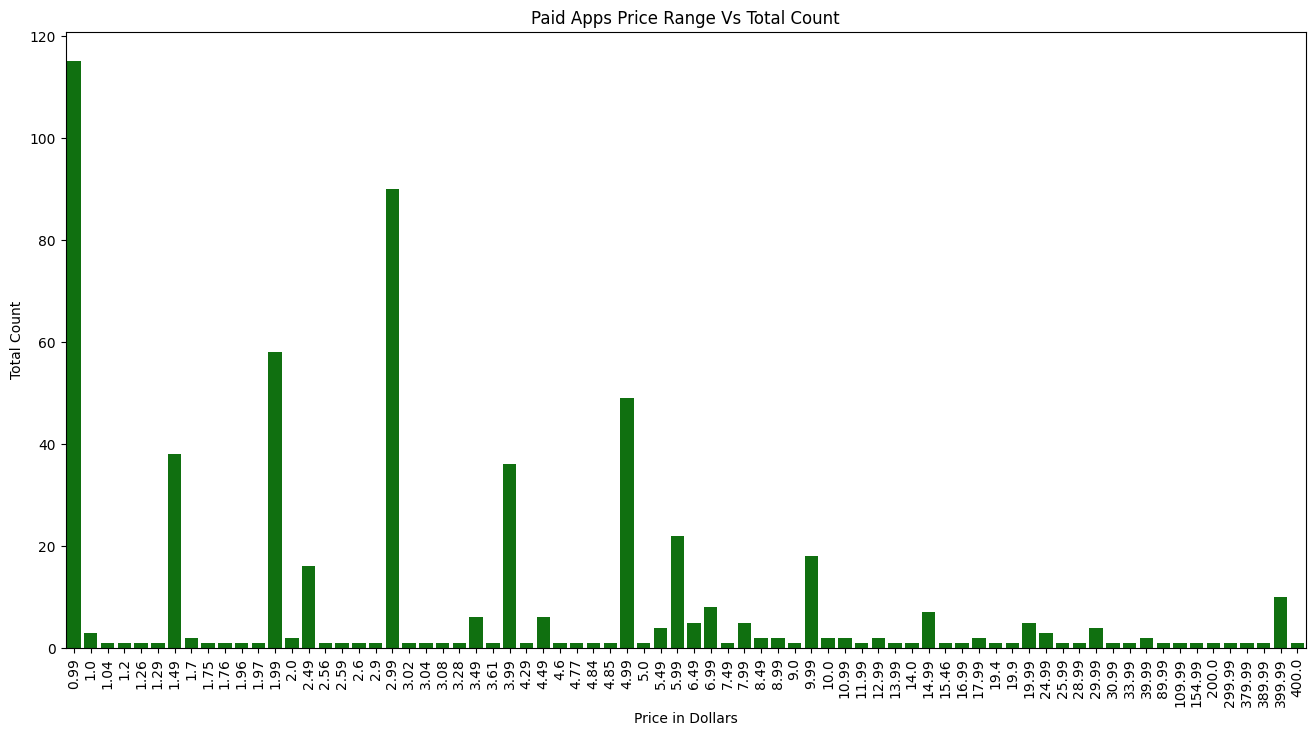

In [49]:
Paid_Apps = data['Price in Dollars'][data['Price in Dollars'] > 0]
Paid_Apps_Count = data['Price in Dollars'][data['Price in Dollars'] > 0].value_counts()
App_Price_percentage = pd.DataFrame({
    "Price in Dollars": Paid_Apps_Count.index,
    "Percentage": (Paid_Apps_Count / Paid_Apps.shape[0] * 100).round(2)
}).sort_values(by="Percentage", ascending=False).reset_index(drop=True).head(10)


plt.figure(figsize=(16,8))

sns.barplot(Paid_Apps_Count.sort_index(ascending=False), color='green')

plt.title("Paid Apps Price Range Vs Total Count")
plt.xlabel("Price in Dollars")
plt.xticks(rotation = 90)
plt.ylabel("Total Count")
plt.show()



- Most of the Apps are priced at a very low price (99 cents).
- Around 15% of the Apps are priced at 2.99 dollars.
- 10% of the Apps are priced at 1.99 dollars.
- 10 Apps are priced at 399.99 dollars in the dataset.

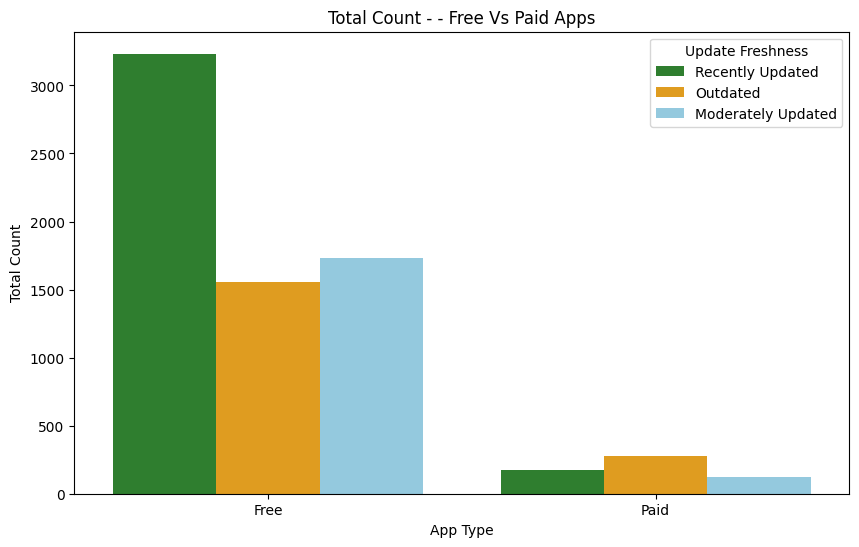

In [50]:


plt.figure(figsize=(10,6))

sns.countplot(data = data, x = 'Type', hue = 'Update Freshness', palette=['forestgreen', 'orange', 'skyblue'])

plt.title("Total Count - - Free Vs Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Total Count")
plt.show()


**In case of Free Apps:**
- Most of the apps are receiving regular updates.
- Number of the outdated apps that are getting no updates are low in number.

**In case of Paid Apps:**
- Most Paid apps are already outdated and not receiving any updates.
- Some of the apps are receiving regular updates, the apps that are receiving updates occasionally are low in number.

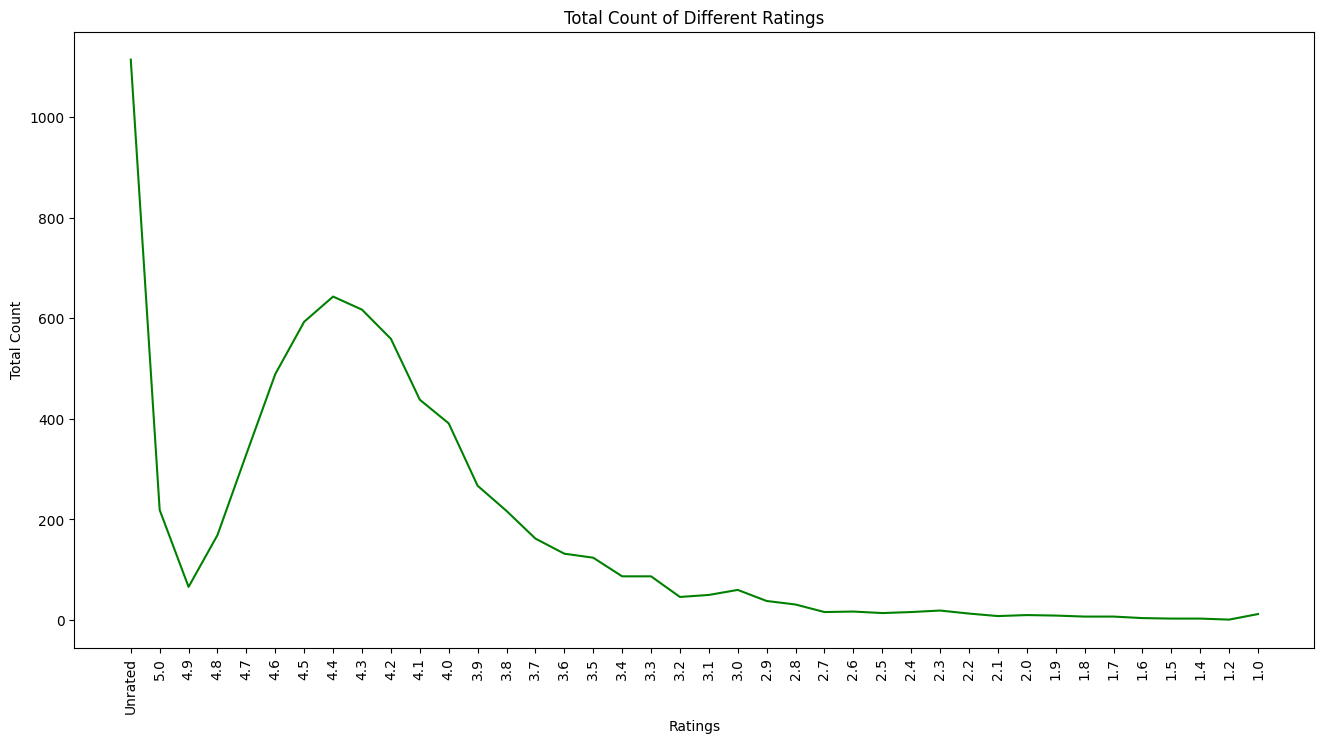

In [51]:


plt.figure(figsize=(16,8))

sns.lineplot(data['Rating'].value_counts().sort_index(ascending=False), color='green')

plt.title("Total Count of Different Ratings")
plt.xlabel("Ratings")
plt.xticks(rotation = 90)
plt.ylabel("Total Count")
plt.show()


- It is clear that Number of Apps that are unrated are in huge number.
- Most of the Apps are rated between  4.0 - 4.6.
- Apps that are rated 3.5 and below are significantly lower in number.


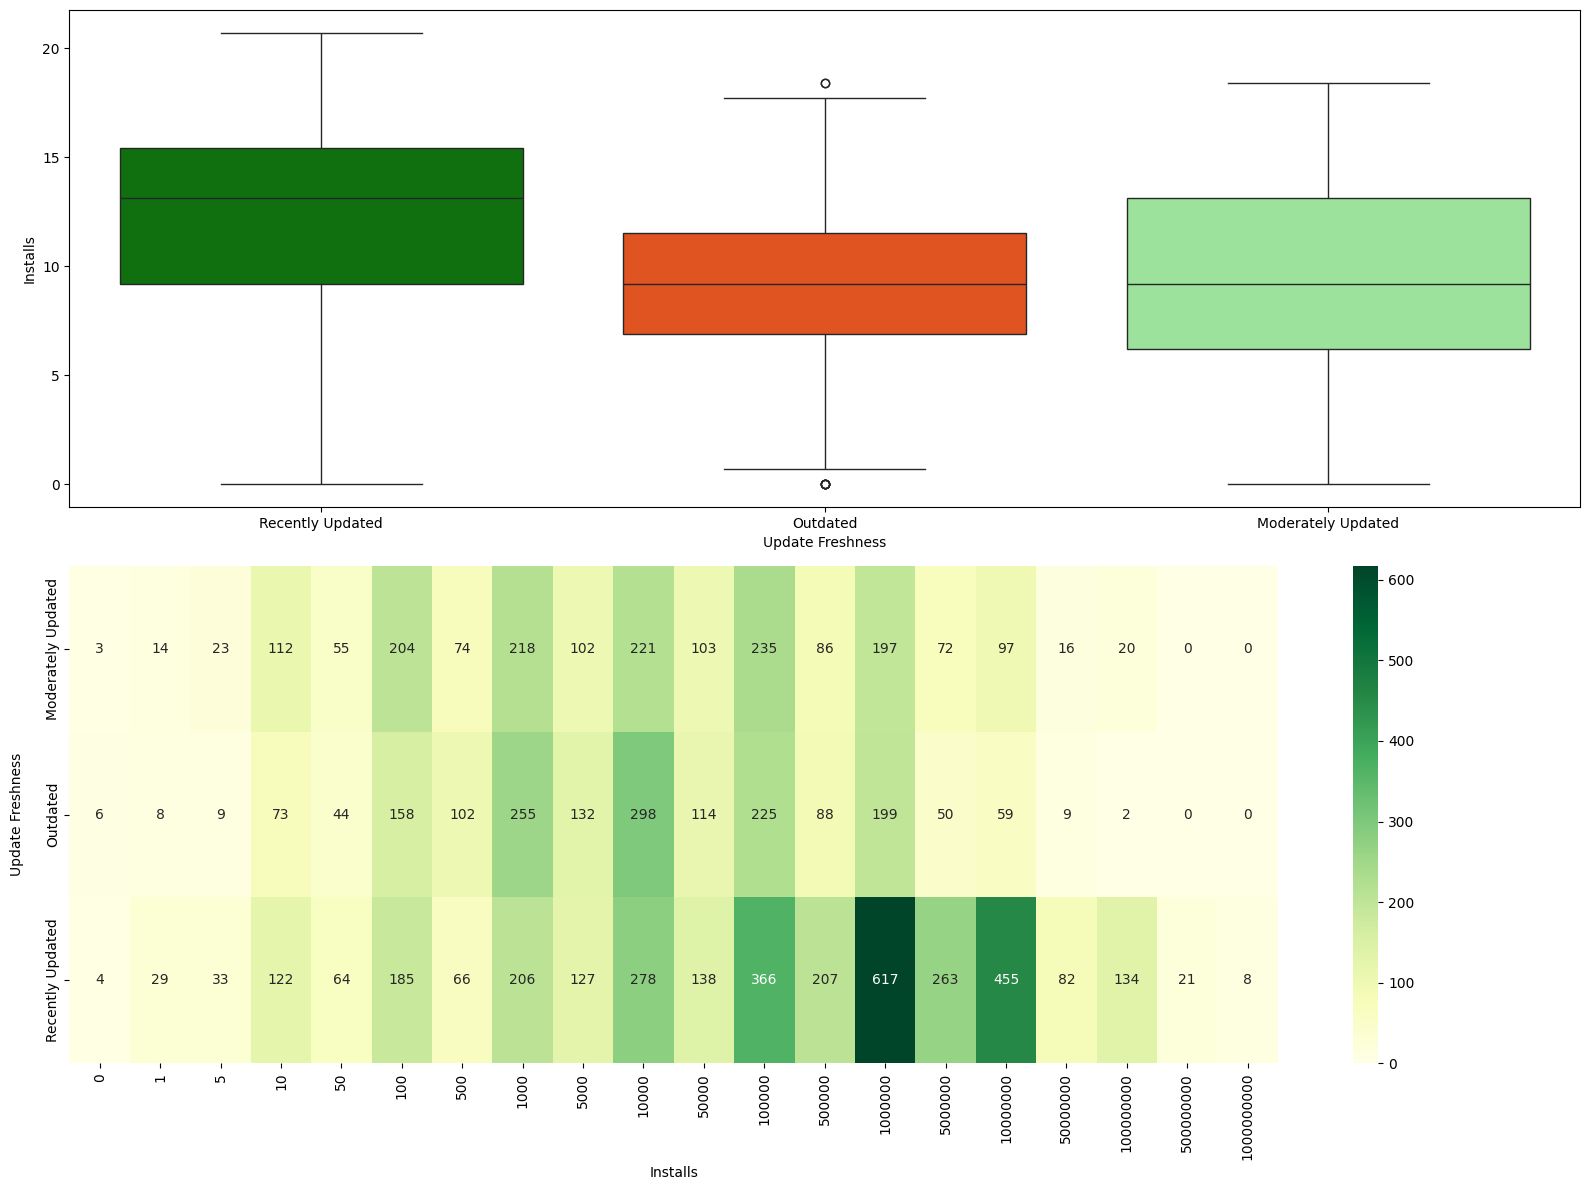

In [52]:
plt.figure(figsize=(16,12))


plt.subplot(2,1,1)
sns.boxplot(x=data['Update Freshness'], y=np.log1p(data['Installs']), palette=['green', 'orangered', 'lightgreen'])


plt.subplot(2,1,2)
sns.heatmap(pd.crosstab(data['Update Freshness'], data['Installs']), annot=True, cmap = 'YlGn',fmt='.0f')
plt.ylabel("Update Freshness\n")


plt.tight_layout()

- Most number of Apps are getting recent updates as discussed/shown before... and these apps also have the most number of Installs around 617.
- Apps that receive updates frequently have Overall higher number of downloads as well... 
- More than 500 Apps have over 10 million Downloads that receive the updates more frequently.
- At Number 2, Apps that receive updates once in a while have decent amount of installs as well... 20 Apps have almost 100 million downloads in this categroy.
- Apps belonging to Outdated category has only 2 Apps that have installs of 10 milllion.


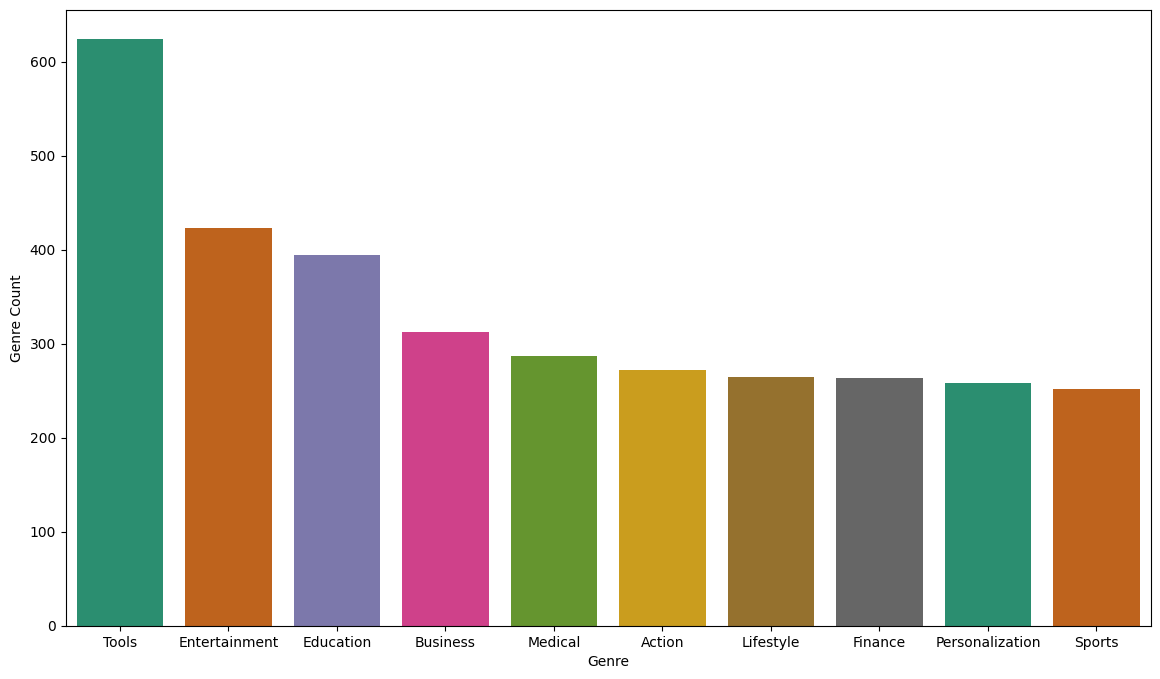

In [53]:


plt.figure(figsize=(14,8))

Top_10_Genre = pd.DataFrame({"Genre": data['Genres'].value_counts().sort_values(ascending=False).head(10).index,
              "Genre Count": data['Genres'].value_counts().sort_values(ascending=False).head(10).values})

sns.barplot(data = Top_10_Genre, x = 'Genre', y = 'Genre Count', palette = 'Dark2')

plt.show()




- Genre : ***"Tools"*** consists of 624 Apps which is highest of all.
- Genre : ***"Entertainment" and "Education"*** are the second in number containing 423 and 394 apps respectively.
- Genre : ***'Action','Lifestyle', 'Finance', 'Personalization', and 'Sports'*** all consists of the apps ranging in number between 272 and 252... 

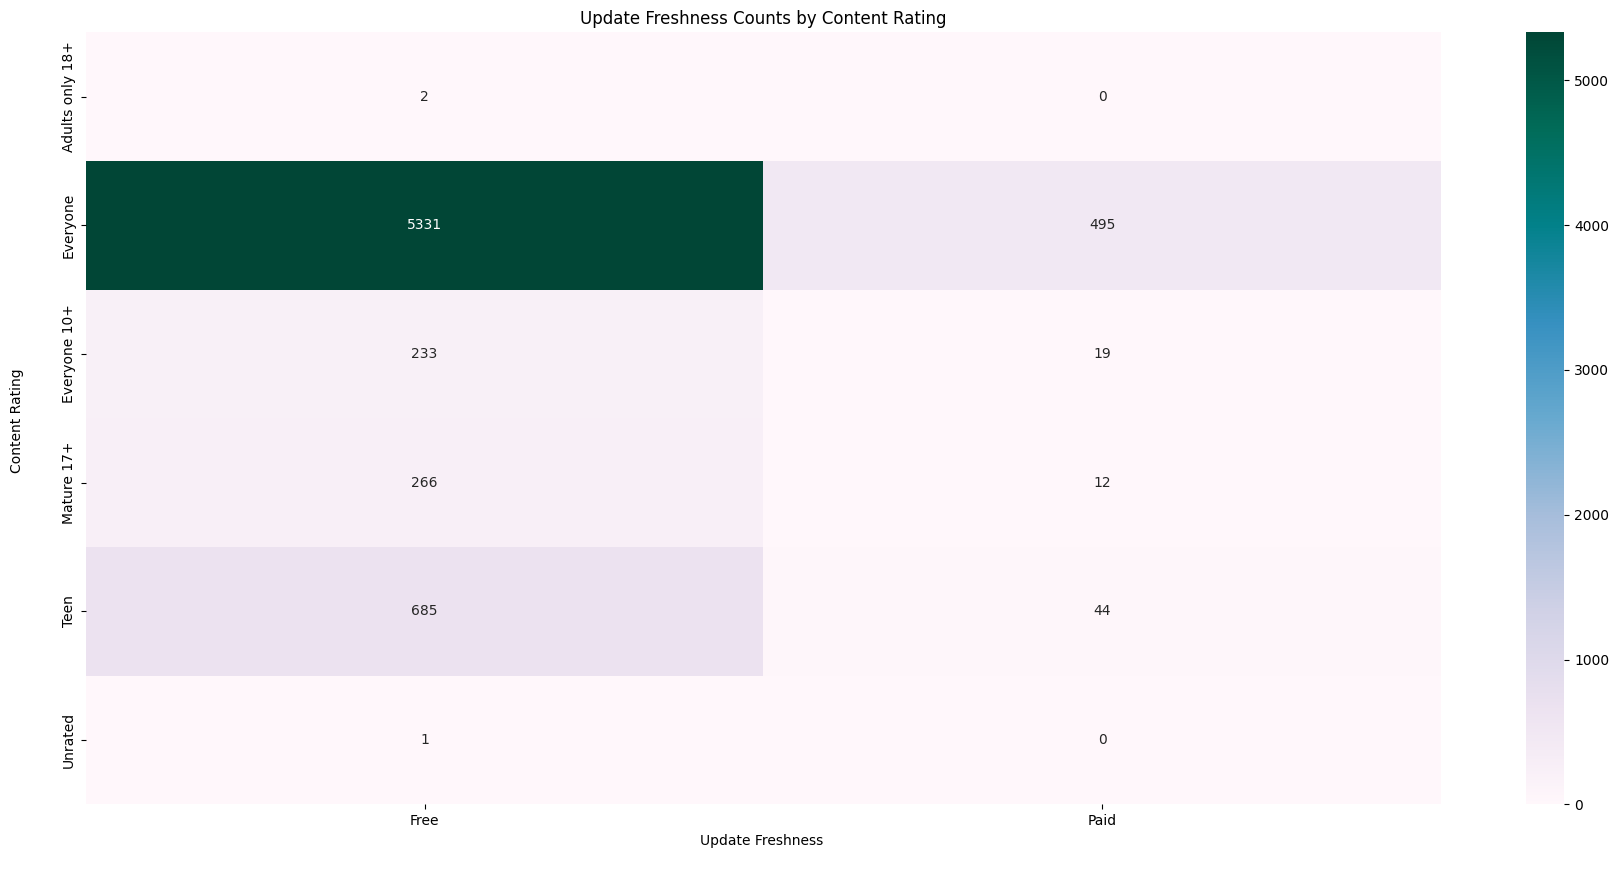

In [55]:


ct = data.groupby(['Content Rating', 'Type']).size().unstack(fill_value=0)

plt.figure(figsize=(18,9))
sns.heatmap(ct, annot=True, fmt='d', cmap='PuBuGn')
plt.title("Update Freshness Counts by Content Rating")
plt.ylabel("Content Rating \n\n")
plt.xlabel("Update Freshness \n\n")

plt.tight_layout()
plt.show()


- Most number of Ratings are done by the individual that are in their teens for both Free and Paid apps.
- Individuals below 17 are more likely to rate the paid apps compared to the individuals that belong to Mature 17+ Category.